## <u> COGS 109 Assignment 4 </u>
# Part1 K-means Clustering 

K-means clustering is a type of unsupervised learning, which is used with unlabeled dataset. The goal of this algorithm is to find K groups in the data. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

- The centroids of the K clusters, which can be used to label new data
- Labels for the training data (each data point is assigned to a single cluster)

K-means works by defining spherical clusters that are separable in a way so that the mean value converges towards the cluster center. Because of this, K-Means may underperform sometimes.

<b><u>Use Cases:</u></b>
- Document Classification
- Delivery Store Optimization
- Customer Segmentation
- Insurance Fraud Detection etc.

### <u> Algorithm </u>:

Κ-means clustering algorithm inputs are the number of clusters Κ and the data set. Algorithm starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

<b><u>1. Data assigment step:</u></b>

Each centroid defines one of the clusters. In this step, each data point based on the squared Euclidean distance is assigned to its nearest centroid. If $c_i$ is the collection of centroids in set C, then each data point x is assigned to a cluster based on

$$\underset{c_i \in C}{\min} \; dist(c_i,x)^2$$

where dist( · ) is the standard (L2) Euclidean distance.

<b><u>2. Centroid update step:</u></b>

Centroids are recomputed by taking the mean of all data points assigned to that centroid's cluster.

The algorithm iterates between step one and two until a stopping criteria is met (no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

<b>This algorithm may converge on a local optimum. </b> Assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

<b><u>Choosing K</u></b>

If the true label is not known in advance, then K-Means clustering can be evaluated using <b> Elbow Criterion </b>, <b> Silhouette Coefficient </b> , cross-validation, information criteria, the information theoretic jump method, and the G-means algorithm. .


<b><u>Elbow Criterion Method:</u></b>

The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (e.g k=1 to 10), for each value of k, calculate sum of squared errors (SSE).

Calculate the mean distance between data points and their cluster centroid. Increasing the number of clusters(K) will always reduce the distance to data points, thus decrease this metric, to the extreme of reaching zero when K is as same as the number of data points. So the goal is to choose a small value of k that still has a low SSE.

We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point.

<b><u>Silhouette Coefficient Method:</u></b>

A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

- The mean distance between a sample and all other points in the same class.
- The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient is for a single sample is then given as:

$$s=\frac{b-a}{max(a,b)}$$

To find the optimal value of k for KMeans, loop through 1..n for n_clusters in KMeans and calculate Silhouette Coefficient for each sample.

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

<u>K-Means algorithm uses Eucledean Distance, other popular distance metrics in Machine Learning are:</u>

1. <b> Cosine distance </b>: It determines the cosine of the angle between the point vectors of the two points in the n dimensional space. Closer the point vectors are by angle, the higher is the Cosine Similarity

$$\cos\theta = \frac{\overrightarrow{a} . \overrightarrow{b}}{\parallel \overrightarrow{a} \parallel \parallel \overrightarrow{b} \parallel} = \frac{\sum_{i=1}^{n} a_ib_i}{\sqrt{\sum_{i=1}^{n}a_i^2 \sqrt{\sum_{i=1}^{n}b_i^2}}}$$

where $\overrightarrow{a} . \overrightarrow{b} = \sum_{i=1}^{n}a_ib_i = a_1b_1 + a_2b_2 + ... + a_nb_n$

2. <b> Manhattan distance </b>: is the total sum of the difference between the x-coordinates  and y-coordinates.

$$ManhattanDistance = |x1 – x2| + |y1 – y2|$$

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values. Various distance measures, or norms, are possible:

- Computing the root of a sum of squares (RMSE) corresponds to the Euclidian norm: it is the notion of distance you are familiar with. It is also called the ℓ2 norm(...)

- Computing the sum of absolutes (MAE) corresponds to the ℓ1 norm,(...). It is sometimes called the Manhattan norm because it measures the distance between two points in a city if you can only travel along orthogonal city blocks.

### <u> Credit Card Dataset </u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


Preprocessing: To drop all the irrelevant columns for clustering such as "CUST_ID". And then we use fillna to replace all the null elements with 0.0 (So the null values would not hinder the process).

In [2]:
raw_df = pd.read_csv('CC GENERAL.csv')
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Standardize data
#Hint: Use StandardScaler and scaler.fit_transform
#To do
scaler= StandardScaler() 
scaled_df= scaler.fit_transform(raw_df)
# Normalizing the Data
#To do 
normalized_df = normalize(scaled_df)
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
#We only want 8 and 12 columns to check the clusters based on credit limit and purchase installments
normalized_df = normalized_df[[8,12]]
normalized_df

,8,12
0,-0.301518,-0.409413
1,-0.256269,0.192455
2,-0.259805,0.234046
3,-0.384185,0.346093
4,-0.387551,-0.382671
...,...,...
8945,0.234873,-0.191193
8946,0.240202,-0.195531
8947,0.161244,-0.203640
8948,-0.189920,-0.227375


<b>Elbow Criterion:</b>

<b><u>Elbow Criterion Method:</u></b>

The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (e.g k=1 to 10), for each value of k, calculate sum of squared errors (SSE).

Calculate the mean distance between data points and their cluster centroid. Increasing the number of clusters(K) will always reduce the distance to data points, thus decrease this metric, to the extreme of reaching zero when K is as same as the number of data points. So the goal is to choose a small value of k that still has a low SSE.

We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point.

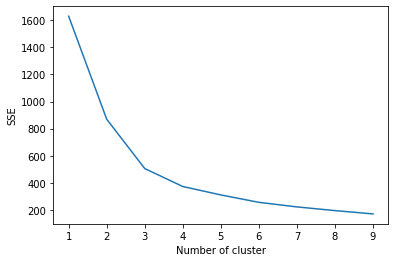

In [4]:
sse = {}
#Implement Kmeans, you can check the reference clustering code to see how to use KMeans function
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(normalized_df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Question1: What value of K do you choose for the elbow point? Why?

Answer: K = 3 since the graph demonstrates a dramatic decrease in the sum of squared errors.  

<b><u>Silhouette Coefficient Method:</u></b>

A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

- The mean distance between a sample and all other points in the same class.
- The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient is for a single sample is then given as:

$$s=\frac{b-a}{max(a,b)}$$

To find the optimal value of k for KMeans, loop through 1..n for n_clusters in KMeans and calculate Silhouette Coefficient for each sample.

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

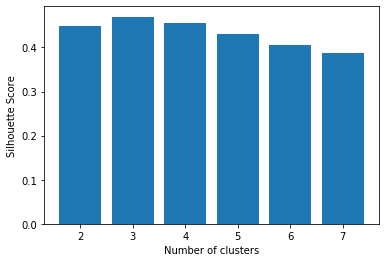

In [5]:
silhouette_scores = [] 
#Hint: Use silhoette_scores library
for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(normalized_df, KMeans(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

## Question2: How many number of clusters do you plan to use? Why?

Answer: I plan to use 3 clusters since the silhouette score is designed to choose the best k. This value is chosen based on the highest silhouette score. In this case it turns out to be 3, now we will run Kmeans. 

In [6]:
#Run KMeans with the number of clusters you choose to use
#Hint: use KMeans
#To do
kmeans = KMeans(n_clusters=3, random_state= 1)
kmeans.fit(normalized_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

Why we choose k-means++ initialization: to find cluster centers that minimize the intra-class variance, i.e. the sum of squared distances from each data point being clustered to its cluster center (the center that is closest to it). 

Use scatter plot to visualizing the clustering so we can see how well the clustering works

#Cluster 1 (Deep blue): People who don't spend much money and who have average to low credit limit
#Cluster 2 (Green): People with average to high credit limit who make all type of purchases and pay mostly in installments
#Cluster 3 (Light Blue): Low credit limit people, who make expensive purchases with frequent cash in advance

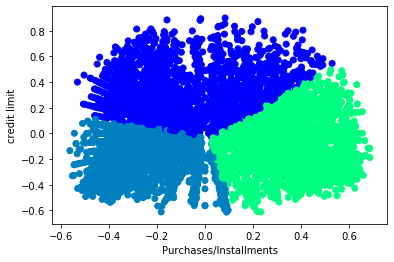

In [7]:
plt.scatter(normalized_df[8], normalized_df[12],  
           c = KMeans(n_clusters = 3).fit_predict(normalized_df), cmap =plt.cm.winter) 
plt.xlabel("Purchases/Installments")
plt.ylabel("credit limit")
plt.show() 


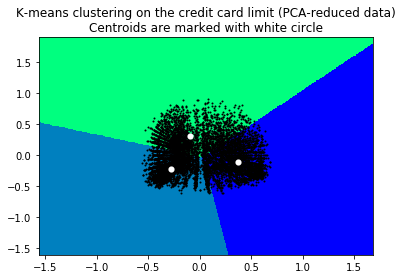

In [8]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = normalized_df[8].min() - 1, normalized_df[8].max() + 1
y_min, y_max = normalized_df[12].min() - 1, normalized_df[12].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.

# https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
# https://www.geeksforgeeks.org/differences-flatten-ravel-numpy/
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = kmeans.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
# https://stackoverflow.com/questions/16661790/difference-between-plt-close-and-plt-clf
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.winter,
           aspect='auto', origin='lower')

plt.plot(normalized_df[8], normalized_df[12], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card limit (PCA-reduced data)\n'
          'Centroids are marked with white circle')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

## Question2.1: What did the above code do? Do you think the clustering model works satisfactorily?

Answer: You are increasing the quality of the clusters and making the centroids visible using a step size, as well as mins and maxs for your variables. This is better quality compared to a scatter plot to say the least. I believe this clustering odel works since the use of a small step size and the decision boundary computation seems to be more percise.  

### <u>Accuracy metrics</u>

As opposed to classfication, it is difficult to assess the quality of results from clustering. Here, a metric cannot depend on the labels but only on the goodness of split. Secondly, we do not usually have true labels of the observations when we use clustering.

There are internal and external goodness metrics. External metrics use the information about the known true split while internal metrics do not use any external information and assess the goodness of clusters based only on the initial data. The optimal number of clusters is usually defined with respect to some internal metrics.

<u> <b>External Goodness Metrics</b></u>

F-measure, Normalized Mutual Information(the average mutual information between every pair of clusters and their class), Rand Index etc.

<u> <b>Internal Goodness Metrics</b></u>

Davies-Bouldin index,Silhouette index,Dunn index,Partition Coefficient, Entropy,Separation Index,Xie and Beni's Index etc.

<u> <b>Normalized Mutual Information (NMI)</b></u>

Mutual Information of two random variables is a measure of the mutual dependence between the two variables. Normalized Mutual Information is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation). In other words, 0 means dissimilar and 1 means a perfect match.

<u> <b>Adjusted Rand Score (ARS)</b></u>

Adjusted Rand Score on the other hand, computes a similarity measure between two clusters. ARS considers all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clusters. 0 is the lowest similarity and 1 is the highest.

## Question3: Which metric do you think should be used here, and why?

Answer: 
The Silhouette Coefficient Method allowed for the determination of better-defined clusters. It turns out three clusters are optimal considering our data "normalized_df" required internal goodness metrics. Like the credit card data example, Internal Goodness metrics include: Davies-Bouldin index, Silhouette index, Dunn index, Partition Coefficient, Entropy, Separation Index, Xie and Beni's Index etc.
Normalized mutual information was used once the data was standardized.

# Part2: Hierarchical clustering

<b>Hierarchical clustering </b> (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

- <b>Agglomerative </b>: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
- <b>Divisive </b>: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.

## Agglomerative Clustering

Initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until 1/ K clusters are formed.

The main advantage is that we don’t need to specify the number of clusters, this comes with a price: performance $O(n^3)$. In sklearn’s implementation, we can specify the number of clusters to assist the algorithm’s performance.

### Algorithm
- Compute the proximity matrix
- Let each data point be a cluster
- Repeat: Merge two closest clusters and update the proximity matrix until 1/ K cluster remains

Ex. - We have six data points {A,B,C,D,E,F}.

- In the initial step, we consider all the six data points as individual clusters as shown in the image below.
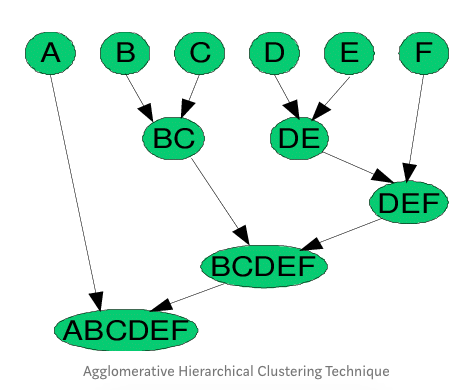


- The first step is to determine which elements to merge in a cluster. Usually, we want to take the two closest elements, according to the chosen distance.We construct a distance matrix at this stage, where the number in the i-th row j-th column is the distance between the i-th and j-th elements. Then, as clustering progresses, rows and columns are merged as the clusters are merged and the distances updated.


For text or other non-numeric data, metrics such as the Hamming distance or Levenshtein distance are often used.

- Similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F. To calculate the proximity between two clusters, we need to define the distance between them. Usually the distance is one of the following:
     - The maximum distance between elements of each cluster (also called  <b> complete-linkage clustering </b>)
     - The minimum distance between elements of each cluster (also called <b> single-linkage clustering </b>)
     - The mean distance between elements of each cluster (also called <b> average linkage clustering </b>)
     - The sum of all intra-cluster variance.
- Again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
- Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
- Finally, all the clusters are merged together and form a single cluster.





The Hierarchical clustering Technique can be visualized using a Dendrogram.
A Dendrogram is a tree-like diagram that records the sequences of merges or splits.

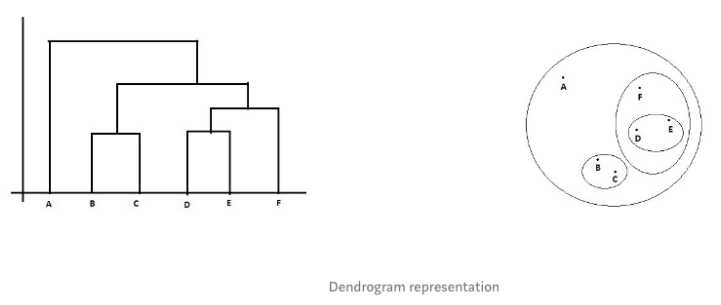

### Example

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [10]:
raw_df = pd.read_csv('CC GENERAL.csv')
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 

list(raw_df)

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [11]:
# Standardize data
#Hint: Use StandardScaler and scaler.fit_transform
#To do
scaler= StandardScaler()
scaled_df= scaler.fit_transform(raw_df) 

# Normalizing the Data
#To do
normalized_df = normalize(scaled_df)
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
#We only want 8 and 12 columns to check the clusters based on credit limit and purchase installments
normalized_df = normalized_df[[8,12]]

print(normalized_df)

            8         12
0    -0.301518 -0.409413
1    -0.256269  0.192455
2    -0.259805  0.234046
3    -0.384185  0.346093
4    -0.387551 -0.382671
...        ...       ...
8945  0.234873 -0.191193
8946  0.240202 -0.195531
8947  0.161244 -0.203640
8948 -0.189920 -0.227375
8949 -0.184523 -0.182199

[8950 rows x 2 columns]


<b>Dendograms </b> are used to divide a given cluster into many different clusters.

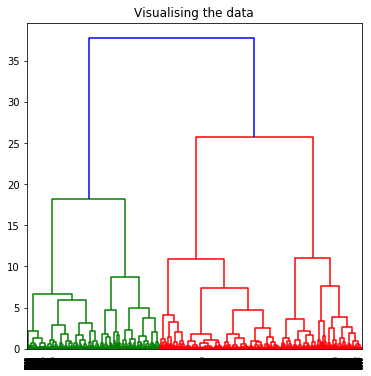

In [12]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(normalized_df, method ='ward')))

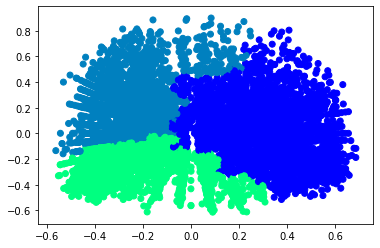

In [13]:
# Visualizing the clustering 
plt.scatter(normalized_df[8], normalized_df[12],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(normalized_df), cmap =plt.cm.winter) 
plt.show() 

Determine the optimal number of clusters using <b> [Silhouette Score]</b> like we did for KMeans earlier.

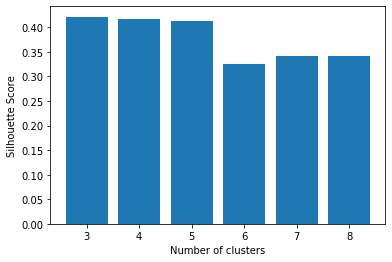

In [14]:
silhouette_scores = [] 


#To do
for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(normalized_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df)))
    
    
# Plotting a bar graph to compare the results 
k = [3,4, 5, 6, 7,8] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

# Question4: How many clusters do you think we should use and why?

- Cluster 1 (Deep blue): People who don't spend much money and who have average to high credit limit
- Cluster 2 (Green): People with average to high credit limit who make all type of purchases and pay mostly in installments
- Cluster 3 (Light Blue): High credit limit people, who make expensive purchases with frequent cash in advance

Apply Agglomerative Clustering on 3 clusters since this seems to be the optimal k considering the optimizing k alogrithms. 

In [15]:
#To do
aglo_clustering = AgglomerativeClustering(n_clusters=3)
aglo_clustering.fit(normalized_df)



AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

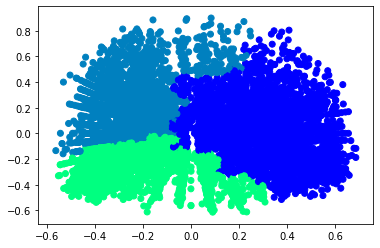

In [16]:
# Visualizing the clustering 
plt.scatter(normalized_df[8], normalized_df[12],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(normalized_df), cmap =plt.cm.winter) 

plt.show()

# Second Dataset: FIFA

Congratulations! You have learned how to implement KMeans and Hierachical Clustering and the rationale behind them. Now perform KMeans clustering by yourself for the second dataset.

In [17]:
#reading the data into a df
df = pd.read_csv("data.csv")
print(df.shape)
df.head()

(18207, 89)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [18]:
#Clean the null values
df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Body Type','Real Face', 'Loaned From','Release Clause','Joined'],axis=1,inplace=True)

df = df[['Name','Age','Nationality','Overall', 'Club', 'Value','Wage', 'Special','International Reputation','Position',
             'Jersey Number', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
             'HeadingAccuracy', 'ShortPassing', 'Volleys','Dribbling', 'FKAccuracy','LongPassing',
             'BallControl','Acceleration','SprintSpeed', 'Agility','Reactions','Balance','ShotPower',
             'Jumping', 'Stamina', 'Strength','LongShots',
             'Aggression','Interceptions','Positioning','Vision',
             'Composure','Marking','Penalties','StandingTackle', 'SlidingTackle']]
print(df.shape)
df.head()

(18207, 42)


,Name,Age,Nationality,Overall,Club,Value,Wage,Special,International Reputation,Position,...,LongShots,Aggression,Interceptions,Positioning,Vision,Composure,Marking,Penalties,StandingTackle,SlidingTackle
0,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,€565K,2202,5.0,RF,...,94.0,48.0,22.0,94.0,94.0,96.0,33.0,75.0,28.0,26.0
1,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,2228,5.0,ST,...,93.0,63.0,29.0,95.0,82.0,95.0,28.0,85.0,31.0,23.0
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,€290K,2143,5.0,LW,...,82.0,56.0,36.0,89.0,87.0,94.0,27.0,81.0,24.0,33.0
3,De Gea,27,Spain,91,Manchester United,€72M,€260K,1471,4.0,GK,...,12.0,38.0,30.0,12.0,68.0,68.0,15.0,40.0,21.0,13.0
4,K. De Bruyne,27,Belgium,91,Manchester City,€102M,€355K,2281,4.0,RCM,...,91.0,76.0,61.0,87.0,94.0,88.0,68.0,79.0,58.0,51.0


In [19]:
df.dropna(inplace = True)
print(df.isnull().sum())
print(df.shape)
df.head()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Club                        0
Value                       0
Wage                        0
Special                     0
International Reputation    0
Position                    0
Jersey Number               0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression

,Name,Age,Nationality,Overall,Club,Value,Wage,Special,International Reputation,Position,...,LongShots,Aggression,Interceptions,Positioning,Vision,Composure,Marking,Penalties,StandingTackle,SlidingTackle
0,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,€565K,2202,5.0,RF,...,94.0,48.0,22.0,94.0,94.0,96.0,33.0,75.0,28.0,26.0
1,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,2228,5.0,ST,...,93.0,63.0,29.0,95.0,82.0,95.0,28.0,85.0,31.0,23.0
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,€290K,2143,5.0,LW,...,82.0,56.0,36.0,89.0,87.0,94.0,27.0,81.0,24.0,33.0
3,De Gea,27,Spain,91,Manchester United,€72M,€260K,1471,4.0,GK,...,12.0,38.0,30.0,12.0,68.0,68.0,15.0,40.0,21.0,13.0
4,K. De Bruyne,27,Belgium,91,Manchester City,€102M,€355K,2281,4.0,RCM,...,91.0,76.0,61.0,87.0,94.0,88.0,68.0,79.0,58.0,51.0


# Question 1: Choose 2 columns to standarize and use for clustering. Which 2 columns did you choose?

In [20]:
#Eliminate columns with strings and information that doesn't relate to the rating of a player
df = df.iloc[ : , 14:42]
print(df.head())
print(df.columns.get_loc("Finishing"))
print(df.columns.get_loc("Aggression"))

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     86.0       97.0   
1      84.0       94.0             89.0          81.0     87.0       88.0   
2      79.0       87.0             62.0          84.0     84.0       96.0   
3      17.0       13.0             21.0          50.0     13.0       18.0   
4      93.0       82.0             55.0          92.0     82.0       86.0   

   FKAccuracy  LongPassing  BallControl  Acceleration  ...  LongShots  \
0        94.0         87.0         96.0          91.0  ...       94.0   
1        76.0         77.0         94.0          89.0  ...       93.0   
2        87.0         78.0         95.0          94.0  ...       82.0   
3        19.0         51.0         42.0          57.0  ...       12.0   
4        83.0         91.0         91.0          78.0  ...       91.0   

   Aggression  Interceptions  Positioning  Vision  Composure  Marking  \
0        48.0           2

In [21]:
#Standardize the data  
Scalar = StandardScaler()
Scaled_df = Scalar.fit_transform(df)

#Normalize the data
Normalized_Df = normalize(Scaled_df)

#Convert to a DataFrame 
Normalized_df = pd.DataFrame(Normalized_Df)


#Choose two columns. We only want to check the clusters based on Aggression and Finishing
Fifa_df = Normalized_df[[1, 19]]


Fifa_df



,1,19
0,0.239228,-0.042884
1,0.238100,0.039372
2,0.217373,0.000714
3,-0.229979,-0.141896
4,0.197663,0.122787
...,...,...
17913,-0.095958,-0.140594
17914,0.050349,-0.078309
17915,-0.049372,-0.237509
17916,0.034548,-0.201119


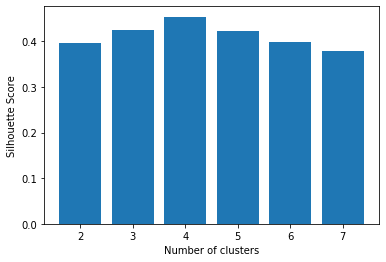

In [22]:
#Run silhouette_scores to determine how many clusters to use

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(Fifa_df, KMeans(n_clusters = n_cluster).fit_predict(Fifa_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

# Question 2: How many clusters do you plan to use? What does each cluster mean?

In [23]:
#Optimal k is 4 according to our silhouette Score 

#Run Kmeans 
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(Fifa_df)

#Columns being used 
Fifa_df[1]
Fifa_df[19]

0       -0.042884
1        0.039372
2        0.000714
3       -0.141896
4        0.122787
           ...   
17913   -0.140594
17914   -0.078309
17915   -0.237509
17916   -0.201119
17917    0.002029
Name: 19, Length: 17918, dtype: float64

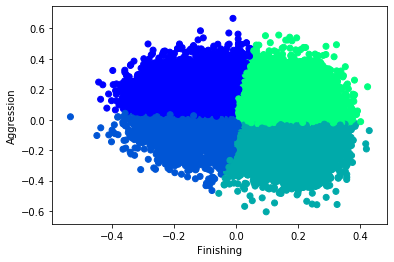

In [24]:
#Scatter plot Kmeans result
plt.scatter(Fifa_df[1], Fifa_df[19],  
           c = KMeans(n_clusters = 4).fit_predict(Fifa_df), cmap =plt.cm.winter) 

plt.xlabel('Finishing')
plt.ylabel('Aggression') 
plt.show()   


#Cluster 1 (Blue): Players with average-low finishing abilities tend to cluster around average-high aggression 
#Cluster 2 (Deep Blue): Players with average-low finishing tend to cluster around average-low aggression 
#Cluster 3 (Pine Green): Players with average-high finishing tend to cluster around average-low aggression
#Cluster 4 (Neon Green): Players with average-high finishing tend to cluster around average-high aggression

# Extra Credit: Perform Hierachical Clustering on the FIFA Dataset

In [42]:
#reading the data into a df
df2 = pd.read_csv("data.csv")
print(df2.shape)
df2.head()

(18207, 89)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [43]:
#Clean the null values
df2.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Body Type','Real Face', 'Loaned From','Release Clause','Joined'],axis=1,inplace=True)

df2 = df2[['Name','Age','Nationality','Overall', 'Club', 'Value','Wage', 'Special','International Reputation','Position',
             'Jersey Number', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
             'HeadingAccuracy', 'ShortPassing', 'Volleys','Dribbling', 'FKAccuracy','LongPassing',
             'BallControl','Acceleration','SprintSpeed', 'Agility','Reactions','Balance','ShotPower',
             'Jumping', 'Stamina', 'Strength','LongShots',
             'Aggression','Interceptions','Positioning','Vision',
             'Composure','Marking','Penalties','StandingTackle', 'SlidingTackle']]
print(df2.shape)
df.head()



(18207, 42)


,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Composure,Marking,Penalties,StandingTackle,SlidingTackle
0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,96.0,33.0,75.0,28.0,26.0
1,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,95.0,28.0,85.0,31.0,23.0
2,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,94.0,27.0,81.0,24.0,33.0
3,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,68.0,15.0,40.0,21.0,13.0
4,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,88.0,68.0,79.0,58.0,51.0


In [44]:
df2.dropna(inplace = True)
print(df2.isnull().sum())
print(df2.shape)
df2.head()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Club                        0
Value                       0
Wage                        0
Special                     0
International Reputation    0
Position                    0
Jersey Number               0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression

,Name,Age,Nationality,Overall,Club,Value,Wage,Special,International Reputation,Position,...,LongShots,Aggression,Interceptions,Positioning,Vision,Composure,Marking,Penalties,StandingTackle,SlidingTackle
0,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,€565K,2202,5.0,RF,...,94.0,48.0,22.0,94.0,94.0,96.0,33.0,75.0,28.0,26.0
1,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,2228,5.0,ST,...,93.0,63.0,29.0,95.0,82.0,95.0,28.0,85.0,31.0,23.0
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,€290K,2143,5.0,LW,...,82.0,56.0,36.0,89.0,87.0,94.0,27.0,81.0,24.0,33.0
3,De Gea,27,Spain,91,Manchester United,€72M,€260K,1471,4.0,GK,...,12.0,38.0,30.0,12.0,68.0,68.0,15.0,40.0,21.0,13.0
4,K. De Bruyne,27,Belgium,91,Manchester City,€102M,€355K,2281,4.0,RCM,...,91.0,76.0,61.0,87.0,94.0,88.0,68.0,79.0,58.0,51.0


In [45]:
#Eliminate columns with strings and information that doesn't relate to the rating of a player
df2 = df2.iloc[ : , 14:42]
print(df2.head())
print(df2.columns.get_loc("Finishing"))
print(df2.columns.get_loc("Aggression"))

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     86.0       97.0   
1      84.0       94.0             89.0          81.0     87.0       88.0   
2      79.0       87.0             62.0          84.0     84.0       96.0   
3      17.0       13.0             21.0          50.0     13.0       18.0   
4      93.0       82.0             55.0          92.0     82.0       86.0   

   FKAccuracy  LongPassing  BallControl  Acceleration  ...  LongShots  \
0        94.0         87.0         96.0          91.0  ...       94.0   
1        76.0         77.0         94.0          89.0  ...       93.0   
2        87.0         78.0         95.0          94.0  ...       82.0   
3        19.0         51.0         42.0          57.0  ...       12.0   
4        83.0         91.0         91.0          78.0  ...       91.0   

   Aggression  Interceptions  Positioning  Vision  Composure  Marking  \
0        48.0           2

In [46]:
#Standardize the data  
scalar2 = StandardScaler()
Scaled_df2 = scalar2.fit_transform(df2)

#Normalize the data
Normalized_Df2 = normalize(Scaled_df2)

#Convert to a DataFrame 
Normalized_df2 = pd.DataFrame(Normalized_Df2)


#Choose two columns. We only want to check the clusters based on Aggression and Finishing
Fifa_df2 = Normalized_df2[[1, 19]]


Fifa_df2

,1,19
0,0.239228,-0.042884
1,0.238100,0.039372
2,0.217373,0.000714
3,-0.229979,-0.141896
4,0.197663,0.122787
...,...,...
17913,-0.095958,-0.140594
17914,0.050349,-0.078309
17915,-0.049372,-0.237509
17916,0.034548,-0.201119


<b>Dendograms </b> are used to divide a given cluster into many different clusters.

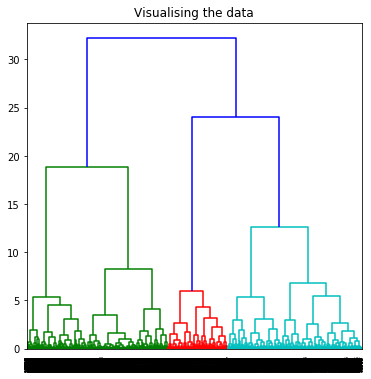

In [47]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(Fifa_df2, method ='ward')))

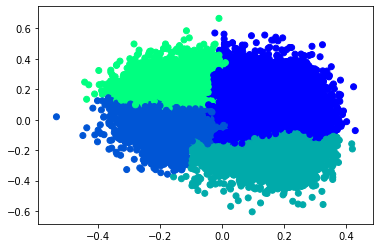

In [50]:
# Visualizing the clustering 
plt.scatter(Fifa_df2[1], Fifa_df2[19],  
           c = AgglomerativeClustering(n_clusters = 4).fit_predict(Fifa_df2), cmap =plt.cm.winter) 
plt.show() 

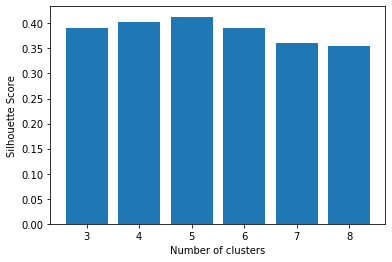

In [51]:
silhouette_scores = [] 


#To do
for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(Fifa_df2, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(Fifa_df2)))
    
    
# Plotting a bar graph to compare the results 
k = [3,4, 5, 6, 7,8] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Apply Agglomerative Clustering on 5 clusters since this seems to be the optimal k considering the optimizing k alogrithms. 

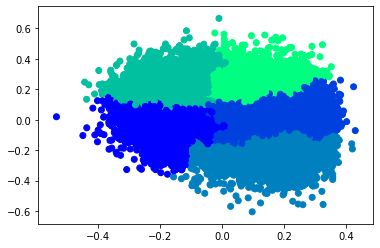

In [52]:
# Visualizing the clustering 
plt.scatter(Fifa_df2[1], Fifa_df2[19],  
           c = AgglomerativeClustering(n_clusters = 5).fit_predict(Fifa_df2), cmap =plt.cm.winter) 

plt.show()